In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-data/health_data_10000_chunk - health_data_10000_chunk.csv
/kaggle/input/medical-data/df1.csv


# Import daraset

In [14]:
import pandas as pd
df1=pd.read_csv('/kaggle/input/medical-data/df1.csv')
df1

,Height (cm),Weight (kg),BMI,Previous gastrointestinal issues,Frequency of bowel movements,Stool consistency (Bristol scale),Presence of bloating,Presence of gas,Presence of abdominal pain,Difficult digestion,...,Personalized recipes_SHAP,Supplement products_SHAP,Supplement timings_SHAP,Medications_SHAP,Gut_Health_Score,Diet_Quality_Score,Metabolic_Risk_Score,Lifestyle_Balance_Index,Supplement_Compliance_Score,Genetic_Risk_Score
0,173,120,40.1,1,6,2,0,1,0,1,...,0.175097,0.102571,0.006817,-0.155934,3,11,40.360339,2.7,2,0.211180
1,183,110,32.8,0,18,6,1,1,1,1,...,0.153504,0.018883,0.091683,0.027926,6,14,33.030901,5.4,0,0.154682
2,170,97,33.6,1,17,4,1,0,0,1,...,-0.265997,-0.115849,-0.076116,-0.002887,1,18,33.625061,6.4,0,-0.289560
3,163,75,28.2,1,21,1,0,0,1,1,...,-0.050389,0.013025,-0.045202,0.136049,3,23,28.205600,9.4,1,-0.163127
4,172,85,28.7,0,20,7,1,0,1,0,...,-0.199303,0.056505,-0.093204,0.034016,0,22,28.508270,3.5,0,-0.014217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9226,187,107,30.6,1,15,6,1,1,1,1,...,-0.075381,-0.179279,-0.058356,0.004398,7,28,30.248196,1.1,1,0.100333
9227,172,67,22.6,0,19,6,0,1,1,0,...,0.176715,0.062678,0.011333,-0.275734,5,21,22.095200,6.9,0,-0.150588
9228,162,89,33.9,1,13,4,1,0,0,0,...,-0.082854,-0.148825,0.020241,-0.097088,4,30,33.551950,6.9,0,-0.093351
9229,153,105,44.9,0,9,2,0,1,1,0,...,0.020888,-0.156151,-0.081750,0.041260,2,21,45.063181,13.0,1,0.030363


# The dataset is already processed, so no further processing is needed except for scaling and balancing

In [15]:
X_train1=df1.drop(columns=['Microbiota_status_ranked'])
y_train1=df1['Microbiota_status_ranked']

# Scaling features only, not the target column

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train1)

# Balancing using SMOTE

In [17]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_balanced, y_balanced = sm.fit_resample(X_scaled, y_train1)

In [18]:
y_balanced.value_counts()

Microbiota_status_ranked
2    4381
0    4381
1    4381
Name: count, dtype: int64

# Convert all into a single dataframe, where the daatset is scaled balanced

In [62]:
df = pd.DataFrame(X_balanced)
df["Microbiota_status_ranked"] = y_balanced.values.astype(int)

# TabTransformer require at least 1 categorical columns, hence turning the target column to it names

In [65]:
df["Microbiota_status_ranked"] = df["Microbiota_status_ranked"].map({
    0: "optimal",
    1: "suboptimal",
    2: "at risk"
})

In [66]:
df

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,Microbiota_status_ranked
0,-0.129578,1.704910,1.416823,0.987191,-1.417773,-1.021038,-1.011659,1.027348,-0.999458,1.002060,...,1.223503,0.294324,-1.007874,-0.471585,-1.923763,1.452935,-1.152204,1.418747,2.087429,at risk
1,0.543730,1.252106,0.594760,-1.012976,1.017293,0.975721,0.988475,1.027348,1.000542,1.002060,...,0.431972,1.883484,0.375730,0.487833,-1.401799,0.627773,-0.504868,-1.415063,1.614946,optimal
2,-0.331570,0.663461,0.684849,0.987191,0.814370,-0.022658,0.988475,-0.973380,-0.999458,1.002060,...,-0.842336,-1.258625,0.143850,-1.111197,-0.705847,0.694664,-0.265114,-1.415063,-2.100162,optimal
3,-0.802886,-0.332709,0.076748,0.987191,1.626059,-1.520227,-1.011659,-0.973380,1.000542,1.002060,...,0.376567,-0.679755,1.189384,-0.471585,0.164093,0.084531,0.454148,0.001842,-1.042829,optimal
4,-0.196908,0.120095,0.133054,-1.012976,1.423137,1.474910,0.988475,-0.973380,1.000542,-0.997944,...,0.787803,-1.578607,0.421560,-1.431004,-0.009895,0.118606,-0.960401,-1.415063,0.202480,suboptimal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13138,-1.202010,0.402978,1.069580,-0.476837,0.651192,-0.753425,0.452345,-0.437090,1.000542,-0.997944,...,2.148390,1.017932,1.653099,1.104359,-1.156054,1.104288,0.261849,1.418747,1.238214,at risk
13139,-0.330456,-1.074270,-0.800702,0.610091,-0.403162,0.881607,0.988475,0.650143,-0.622390,-0.997944,...,0.013320,0.558463,0.048899,1.586175,0.282450,-0.780868,-1.510857,-0.265293,1.127381,at risk
13140,0.831928,1.325439,0.481724,0.876462,-0.290825,0.948086,-1.011659,-0.862620,-0.999458,0.891341,...,0.113923,1.267222,0.706930,-0.187188,1.517469,0.490548,1.272220,0.001842,1.673997,at risk
13141,-1.388329,-0.493117,0.270713,0.063356,-0.012789,-0.597967,-0.087839,1.027348,-0.999458,-0.997944,...,1.978168,0.427206,1.683989,0.192410,0.846779,0.313418,-0.103088,0.764308,-0.149646,at risk


# Starting TabTransformer

In [40]:
!pip install pytorch-tabular[all] --quiet

In [75]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from tab_transformer_pytorch import TabTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, log_loss, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [76]:
df = pd.DataFrame(X_balanced)
df["Microbiota_status_ranked"] = y_balanced.values.astype(int)
df["Microbiota_status_ranked"] = df["Microbiota_status_ranked"].map({
    0: "optimal",
    1: "suboptimal",
    2: "at risk"
})

le = LabelEncoder()
df["target"] = le.fit_transform(df["Microbiota_status_ranked"])
df = df.drop(columns=["Microbiota_status_ranked"])

X = df.drop(columns=["target"]).values
y = df["target"].values

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

n_features = X_train.shape[1]


In [77]:
# STEP 4: Dataset class
class NumericDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self): return len(self.y)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

In [78]:
# STEP 5: EarlyStopping utility
class EarlyStopper:
    def __init__(self, patience=3):
        self.patience = patience
        self.counter = 0
        self.best_loss = float("inf")
        self.best_state = None

    def step(self, val_loss, model):
        if val_loss < self.best_loss:
            self.best_loss = val_loss
            self.best_state = model.state_dict()
            self.counter = 0
            return False
        else:
            self.counter += 1
            return self.counter >= self.patience

    def load_best_weights(self, model):
        if self.best_state is not None:
            model.load_state_dict(self.best_state)

# Hierarchical processing-> this is the top model seperating class 2(at risk) from the others

In [79]:
# STEP 6: Top model (at risk vs others)
y_train_top = (y_train == 2).astype(int)
y_val_top = (y_val == 2).astype(int)
train_top = NumericDataset(X_train, y_train_top)
val_top = NumericDataset(X_val, y_val_top)
train_loader_top = DataLoader(train_top, batch_size=128, shuffle=True)
val_loader_top = DataLoader(val_top, batch_size=256)

model_top = TabTransformer(categories=(), num_continuous=n_features, dim=32, dim_out=2,
                           depth=6, heads=8, attn_dropout=0.1, ff_dropout=0.1,
                           mlp_hidden_mults=(4, 2), mlp_act=nn.ReLU(), continuous_mean_std=None).to(device)
optimizer_top = torch.optim.Adam(model_top.parameters(), lr=1e-3)
criterion_top = nn.CrossEntropyLoss()
early_stopper_top = EarlyStopper(patience=3)

for epoch in range(1, 21):
    model_top.train()
    total_loss = 0
    for xb, yb in tqdm(train_loader_top, desc=f"[Top Epoch {epoch}]", leave=False):
        xb, yb = xb.to(device), yb.to(device)
        empty_cat = torch.empty(xb.size(0), 0, dtype=torch.long).to(device)
        optimizer_top.zero_grad()
        logits = model_top(x_categ=empty_cat, x_cont=xb)
        loss = criterion_top(logits, yb)
        loss.backward()
        optimizer_top.step()
        total_loss += loss.item() * len(yb)

    val_loss = 0
    all_preds, all_true = [], []
    model_top.eval()
    with torch.no_grad():
        for xb, yb in val_loader_top:
            xb = xb.to(device)
            empty_cat = torch.empty(xb.size(0), 0, dtype=torch.long).to(device)
            logits = model_top(x_categ=empty_cat, x_cont=xb)
            preds = logits.argmax(1).cpu()
            all_preds.append(preds)
            all_true.append(yb)
            val_loss += criterion_top(logits.cpu(), yb).item() * len(yb)

    val_loss /= len(val_top)
    acc = accuracy_score(torch.cat(all_true), torch.cat(all_preds))
    print(f"Top Epoch {epoch} | Val Acc: {acc:.4f} | Val Loss: {val_loss:.4f}")
    if early_stopper_top.step(val_loss, model_top):
        print("Early stopping top model")
        break

early_stopper_top.load_best_weights(model_top)

Top Epoch 1 | Val Acc: 0.6824 | Val Loss: 0.5141


Top Epoch 2 | Val Acc: 0.6714 | Val Loss: 0.5031


Top Epoch 3 | Val Acc: 0.6679 | Val Loss: 0.5024


Top Epoch 4 | Val Acc: 0.6660 | Val Loss: 0.5063


Top Epoch 5 | Val Acc: 0.6702 | Val Loss: 0.5013


Top Epoch 6 | Val Acc: 0.6755 | Val Loss: 0.5172


Top Epoch 7 | Val Acc: 0.6717 | Val Loss: 0.5321


Top Epoch 8 | Val Acc: 0.6653 | Val Loss: 0.5610
Early stopping top model


# Starting of bottom model

In [80]:
# STEP 7: Bottom model (only 0 vs 1)
bot_mask_train = y_train != 2
bot_mask_val = y_val != 2

X_train_bot = X_train[bot_mask_train]
y_train_bot = y_train[bot_mask_train]
X_val_bot = X_val[bot_mask_val]
y_val_bot = y_val[bot_mask_val]

train_bot = NumericDataset(X_train_bot, y_train_bot)
val_bot = NumericDataset(X_val_bot, y_val_bot)
train_loader_bot = DataLoader(train_bot, batch_size=128, shuffle=True)
val_loader_bot = DataLoader(val_bot, batch_size=256)

model_bot = TabTransformer(categories=(), num_continuous=n_features, dim=32, dim_out=2,
                           depth=6, heads=8, attn_dropout=0.1, ff_dropout=0.1,
                           mlp_hidden_mults=(4, 2), mlp_act=nn.ReLU(), continuous_mean_std=None).to(device)
optimizer_bot = torch.optim.Adam(model_bot.parameters(), lr=1e-3)
criterion_bot = nn.CrossEntropyLoss()
early_stopper_bot = EarlyStopper(patience=3)


In [81]:
for epoch in range(1, 21):
    model_bot.train()
    for xb, yb in tqdm(train_loader_bot, desc=f"[Bot Epoch {epoch}]", leave=False):
        xb, yb = xb.to(device), yb.to(device)
        empty_cat = torch.empty(xb.size(0), 0, dtype=torch.long).to(device)
        optimizer_bot.zero_grad()
        logits = model_bot(x_categ=empty_cat, x_cont=xb)
        loss = criterion_bot(logits, yb)
        loss.backward()
        optimizer_bot.step()

    # validation loss for early stopping
    model_bot.eval()
    val_loss = 0
    with torch.no_grad():
        for xb, yb in val_loader_bot:
            xb = xb.to(device)
            empty_cat = torch.empty(xb.size(0), 0, dtype=torch.long).to(device)
            logits = model_bot(x_categ=empty_cat, x_cont=xb)
            val_loss += criterion_bot(logits.cpu(), yb).item() * len(yb)
    val_loss /= len(val_bot)
    print(f"Bot Epoch {epoch} | Val Loss: {val_loss:.4f}")
    if early_stopper_bot.step(val_loss, model_bot):
        print("Early stopping bottom model")
        break

early_stopper_bot.load_best_weights(model_bot)


Bot Epoch 1 | Val Loss: 0.0995


Bot Epoch 2 | Val Loss: 0.0667


Bot Epoch 3 | Val Loss: 0.0493


Bot Epoch 4 | Val Loss: 0.0422


Bot Epoch 5 | Val Loss: 0.0417


Bot Epoch 6 | Val Loss: 0.0367


Bot Epoch 7 | Val Loss: 0.0374


Bot Epoch 8 | Val Loss: 0.0407


Bot Epoch 9 | Val Loss: 0.0390
Early stopping bottom model


# Evaluation

In [82]:
# STEP 8: Inference Function
def predict_hierarchical(model_top, model_bot, X, device):
    model_top.eval()
    model_bot.eval()
    preds_final = []
    with torch.no_grad():
        for i in range(0, len(X), 256):
            xb = torch.tensor(X[i:i+256], dtype=torch.float32).to(device)
            empty_cat = torch.empty(xb.size(0), 0, dtype=torch.long).to(device)
            top_logits = model_top(x_categ=empty_cat, x_cont=xb)
            top_preds = top_logits.argmax(1)
            for idx, pred in enumerate(top_preds):
                if pred.item() == 1:  # at risk
                    preds_final.append(2)
                else:
                    bot_logit = model_bot(
                        x_categ=empty_cat[idx:idx+1],
                        x_cont=xb[idx:idx+1]
                    )
                    bot_pred = bot_logit.argmax(1).item()
                    preds_final.append(bot_pred)
    return np.array(preds_final)

y_pred = predict_hierarchical(model_top, model_bot, X_val, device=device)
y_true = y_val


📋 Classification Report:
              precision    recall  f1-score   support

     at risk     0.9677    0.9920    0.9797       876
     optimal     0.5014    0.4189    0.4565       876
  suboptimal     0.4985    0.5678    0.5309       877

    accuracy                         0.6596      2629
   macro avg     0.6559    0.6596    0.6557      2629
weighted avg     0.6558    0.6596    0.6556      2629



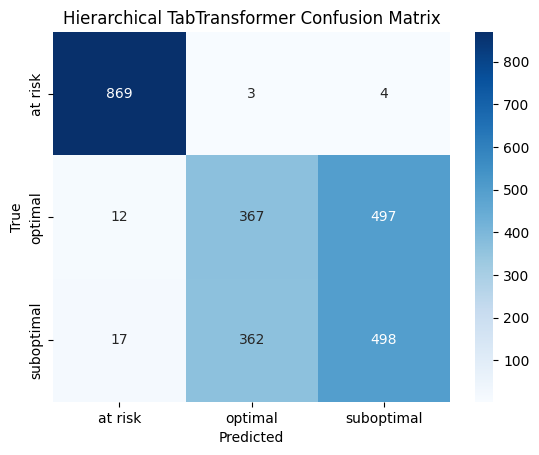

In [83]:
le = LabelEncoder()
le.fit(["optimal", "suboptimal", "at risk"])
y_pred_labels = le.inverse_transform(y_pred)
y_true_labels = le.inverse_transform(y_true)

print("\n📋 Classification Report:")
print(classification_report(y_true_labels, y_pred_labels, digits=4))

cm = confusion_matrix(y_true_labels, y_pred_labels, labels=le.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Hierarchical TabTransformer Confusion Matrix")
plt.show()

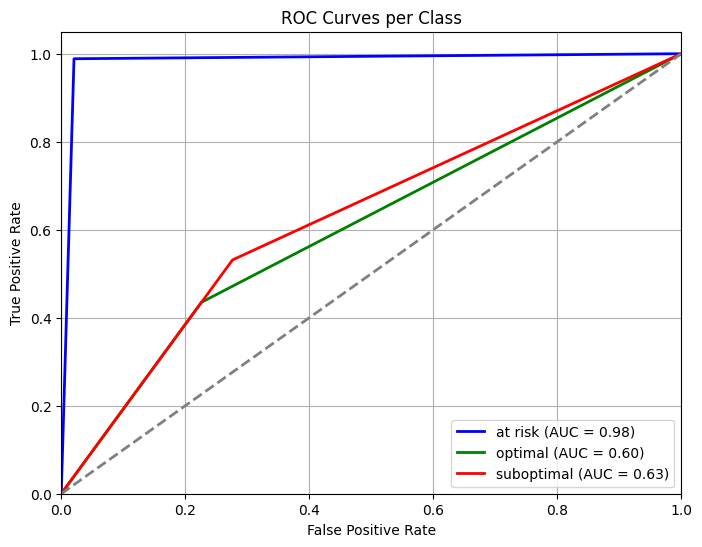

In [89]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize true and predicted labels
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

# Class names (must match label order)
class_names = le.inverse_transform([0, 1, 2])
colors = ['blue', 'green', 'red']

# Plot setup
plt.figure(figsize=(8, 6))

for i in range(3):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2,
             label=f"{class_names[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves per Class")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
